**Tabla de contenido**

- [Definiendo un proceso de media móvil](#Definiendo-un-proceso-de-media-movil)
    - [Identificando el orden de un proceso de media móvil](#Identificando-el-orden-de-un-proceso-de-media-movil)

Este capítulo cubre:
- `Definiendo un proceso de media móvil`.
- `Usando la ACF para identificar el orden de un proceso de media móvil`.
- `Pronosticando una serie temporal utilizando el modelo de media móvil`.

En el capítulo anterior, aprendiste cómo identificar y prever un proceso de paseo aleatorio. Definimos un proceso de paseo aleatorio como una serie cuya primera diferencia es estacionaria y no tiene autocorrelación. Esto significa que al representar su ACF no mostrará coeficientes significativos después del rezago 0. Sin embargo, es posible que un proceso estacionario aún muestre autocorrelación. En este caso, contamos con una serie temporal que se puede aproximar mediante un modelo de media móvil MA(q), un modelo autorregresivo AR(p) o un modelo autorregresivo de media móvil ARMA(p,q). En este capítulo, nos centraremos en identificar y modelar utilizando el modelo de media móvil.


# Definiendo un proceso de media movil

Un proceso de media móvil, o el modelo de media móvil (MA), establece que el valor actual depende linealmente de los términos de error actuales y pasados. Se asume que los términos de error son mutuamente independientes y tienen una distribución normal, al igual que el ruido blanco.

`Un modelo de media móvil se denomina MA(q)`, donde `q es el orden`. El modelo expresa el valor presente como una combinación lineal de la media (μ) de la serie , el término de error presente $ϵ_t$, y los términos de error pasados ϵ_{t–q}. La magnitud del impacto de los errores pasados en el valor presente se cuantifica utilizando un coeficiente denominado $θ_q$. Matemáticamente, expresamos un proceso general de media móvil de orden q de la siguiente forma: $$yt = μ + ϵ_t + θ_1ϵ_{t–1} + θ_2ϵ_{t–2} +⋅⋅⋅+ θ_qϵ_{t–q}$$
`El orden q` del modelo de media móvil `determina el número de términos de error pasados que afectan el valor presente`. Por ejemplo, si es de orden 1, significa que tenemos un proceso MA(1). Aquí podemos ver que el valor presente $y_t$ depende de la media μ, del término de error presente $ϵ_t$, y del término de error en el paso de tiempo anterior $θ_1ϵ_{t–1}$.
$$y_t = μ + ϵ_t + θ_1ϵ_{t–1}$$
`Si tenemos un proceso de media móvil de orden 2`, o MA(2), entonces $y_t$ depende de la media μ de la serie , del término de error presente $ϵ_t$, del término de error en el paso anterior $θ_1ϵ_{t–1}$, y del término de error en dos pasos anteriores $θ_2ϵ_{t–2}, lo que da como resultado la siguiente ecuación. $$y_t = μ + ϵ_t + θ_1ϵ_{t–1} + θ_2ϵ_{t–2}$$
Por lo tanto, podemos ver cómo el orden q del proceso MA(q) afecta la cantidad de términos de error pasados que deben incluirse en el modelo. Cuanto mayor sea q, más términos de error pasados afectan el valor presente. Por lo tanto, es importante determinar el orden del proceso de media móvil para poder ajustar el modelo apropiado; si tenemos un proceso de media móvil de segundo orden, entonces se utilizará un modelo de media móvil de segundo orden para la predicción.

## Identificando el orden de un proceso de media movil

Como de costumbre, el primer paso es recopilar los datos. Luego testamos la estacionariedad. Si nuestra serie no es estacionaria, aplicamos transformaciones, como la diferenciación, hasta que la serie sea estacionaria. Luego trazamos el ACF y buscamos coeficientes de autocorrelación significativos. En el caso de un paseo aleatorio, no veremos coeficientes significativos después del rezago 0. Por otro lado, si vemos coeficientes significativos, debemos verificar si se vuelven abruptamente no significativos después de algún rezago q.

Pongamos esto en acción utilizando nuestros datos sobre el volumen de ventas de widgets de la Compañía XYZ Widget. El conjunto de datos contiene 500 días de datos de volumen de ventas comenzando el 1 de enero de 2019.

In [2]:
import pandas as pd
import os

path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('widget_sales.csv'))
df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


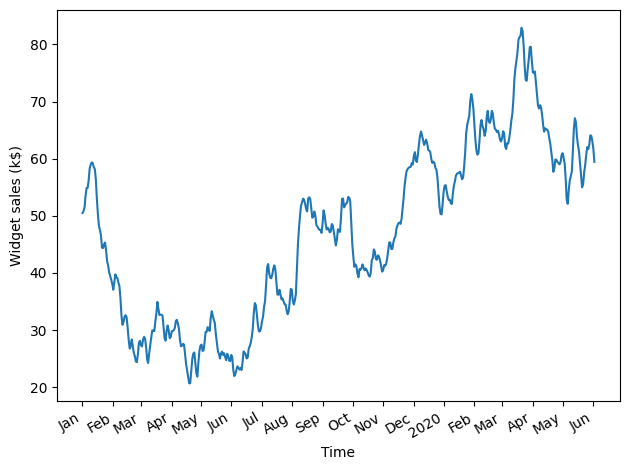

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')
plt.xticks(
[0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409,
439, 468, 498],
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
fig.autofmt_xdate()
plt.tight_layout()